In [1]:
import numpy as np
from qiskit import *
%matplotlib inline
from math import pi, sqrt
import matplotlib.pyplot as plt
import random
import time

import networkx as nx
#pip install networkx

from qiskit.visualization import plot_histogram
from qiskit.visualization import array_to_latex
from qiskit_textbook.tools import random_state

#pip install git+https://github.com/qiskit-community/qiskit-textbook.git#subdirectory=qiskit-textbook-src

import warnings
warnings.filterwarnings('ignore')



In [2]:
backend = Aer.get_backend('statevector_simulator')
def getBloch(quantumC):
    return visualization.plot_bloch_multivector(execute(quantumC, backend).result().get_statevector())
        

In [3]:
def stateGenerator(state):
    state = state[::-1]
    current = int(state, 2)
    newState = [0 for i in range(0, 2**(len(state)))]
    newState[current] = 1
    return newState

In [4]:
def getMeasure(quantumC, n):
    measures = []
    for i in range(0, n):
        outcome = execute(quantumC, backend).result()
        hist = outcome.get_counts()
        for i in hist.keys():
            measures.append(i)
    return measures

In [5]:
def makeCirc(n, state):
    initState = state
    print(initState)
    qr = QuantumRegister(n)
    qc = ClassicalRegister(n)
    circ = QuantumCircuit(qr, qc)
    initializedState = stateGenerator(initState)
    circ.initialize(initializedState, qr)
    return circ

In [6]:
def getHisto(n, circ):
    qasm_sim = Aer.get_backend('qasm_simulator')
    shots = n
    qobj = assemble(circ, shots=shots)
    results = qasm_sim.run(qobj).result()
    counts = results.get_counts()
    return counts

In [30]:
def encodeEdges(circ, edges, r):
    for i in edges:
        circ.cx(i[0], i[1])
        circ.u1(r, i[1])
        circ.cx(i[0], i[1])
        circ.barrier()
    return circ

In [31]:
def encodeDots(circ, dots, r):
    for i in range(dots):
        circ.u3(r, -np.pi/2, np.pi/2, i)
    return circ

In [55]:
#dots = 5
#edges = [(0, 1), (0, 2), (0, 3), (0, 4), (2, 3), (3, 4)]

dots = 5
edges = []
for i in range(dots):
    for j in range(i):
        if (random.randint(0, 100) < 20):
            edges.append((i, j))

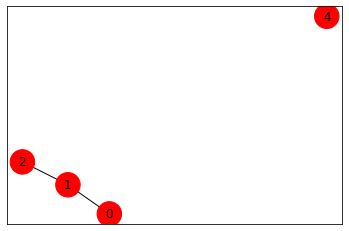

In [56]:
G = nx.Graph()
G.add_node(dots - 1)
G.add_edges_from(edges)

#Generate Visualization of Graph
colors = ['r' for node in G.nodes()]
default_axes = plt.axes(frameon=True)
pos = nx.spring_layout(G)

nx.draw_networkx(G, node_color=colors, node_size=600, ax=default_axes, alpha=1, pos=pos)



In [57]:
def generateQAOA(circ, dots, edges, r):
    circ = encodeEdges(circ, edges, r)
    circ = encodeDots(circ, dots, np.pi-r/2)
    return circ

In [58]:
steps = 2
circ = makeCirc(dots, '0'*dots)
circ.h(range(dots))
for i in range(1, steps+1):
    circ = generateQAOA(circ, dots, edges, 0.4*steps)
circ.measure(range(dots), range(dots))

00000


In [59]:
#circ.draw('mpl', fold=-1)

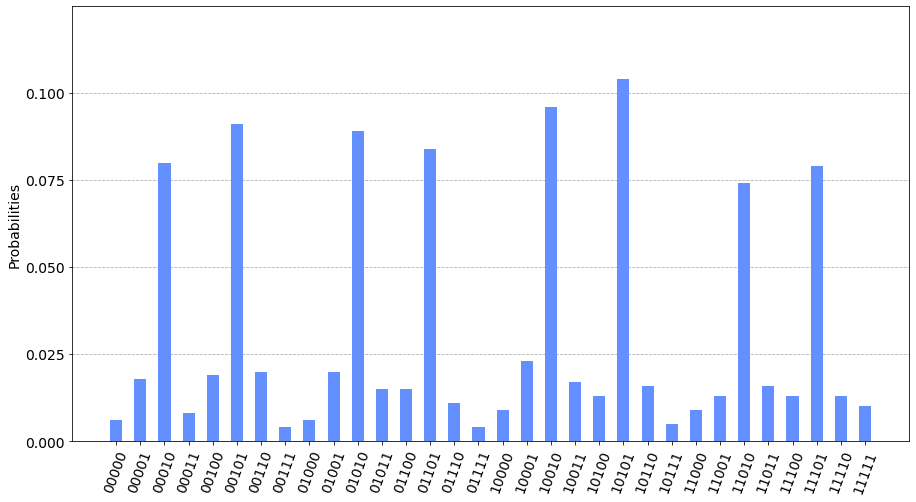

In [60]:
plot_histogram(getHisto(1000, circ), figsize=(15, 8), bar_labels=False)